In [1]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

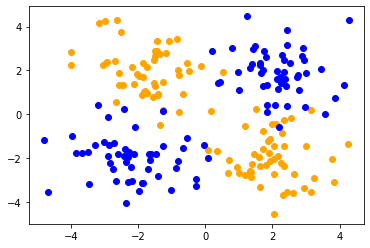

In [2]:
n_samples = 200
A = np.array([[np.random.normal(loc=-2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 

plt.scatter(A[:,0], A[:,1], color = "orange")
plt.scatter(B[:,0], B[:,1], color = "orange")
plt.scatter(C[:,0], C[:,1], color = "blue")
plt.scatter(D[:,0], D[:,1], color = "blue")
plt.show()

In [3]:
feature = np.concatenate([A, B,C,D], axis=0)
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

In [4]:
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)

In [5]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def model(x, w):
    
    qml.RX(x[0]*w[2], wires = 0)
    qml.RX(x[1]*w[3], wires = 1)
    
    qml.RX(w[0], wires = 0)
    qml.RX(w[1], wires = 1)
    qml.CNOT(wires = [1,0])

    
    return qml.expval(qml.PauliZ(wires = 0))

In [6]:
def z_func(x, w):
    return model(x,w)

limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)

    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue")
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im);

    plt.show()

In [7]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)

In [8]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

epoch 0 loss 1.0767222897266069


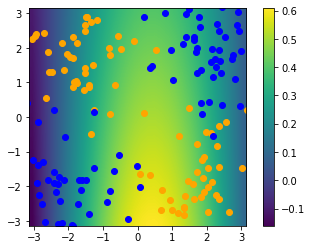

epoch 5 loss 0.9698370669414708


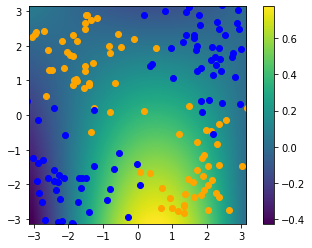

epoch 10 loss 0.7759547964363215


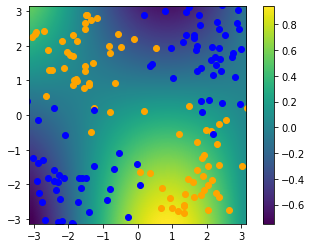

epoch 15 loss 0.5169258972524614


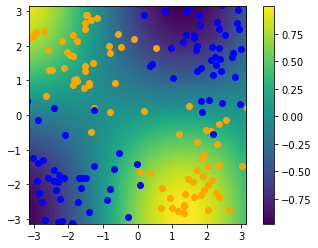

epoch 20 loss 0.37022161899805056


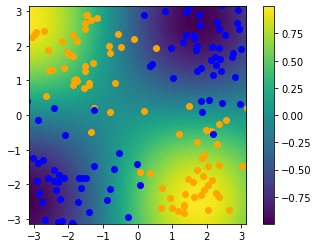

epoch 25 loss 0.3104944421037939


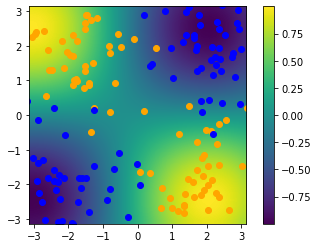

epoch 30 loss 0.2842233108129749


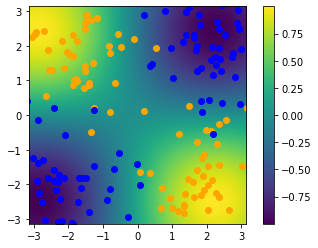

epoch 35 loss 0.27229601611596027


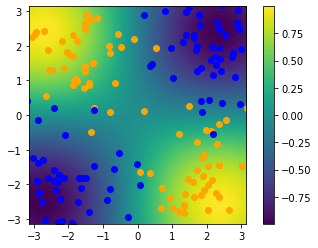

epoch 40 loss 0.26690371964187737


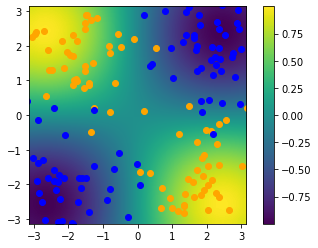

epoch 45 loss 0.2644807450838201


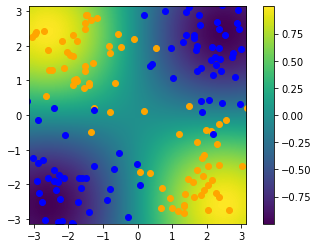

epoch 50 loss 0.26339653978073785


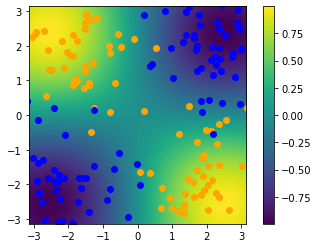

epoch 55 loss 0.26291267384644895


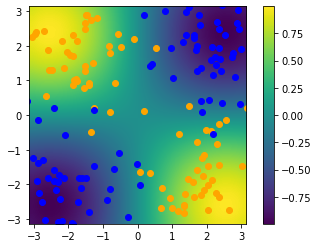

epoch 60 loss 0.262697075118829


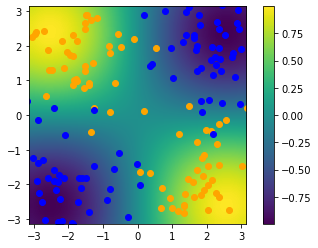

epoch 65 loss 0.26260109232563755


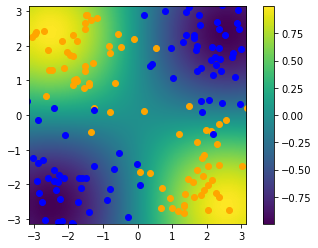

epoch 70 loss 0.26255837622386763


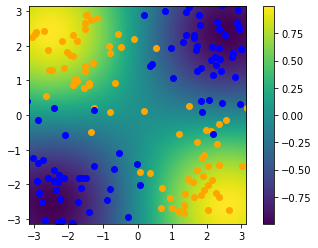

epoch 75 loss 0.26253936534131095


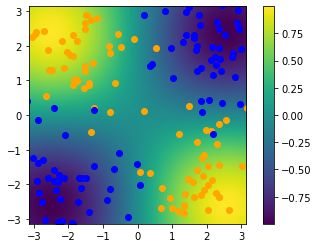

epoch 80 loss 0.26253090196089324


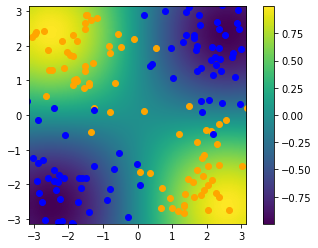

epoch 85 loss 0.2625271322650884


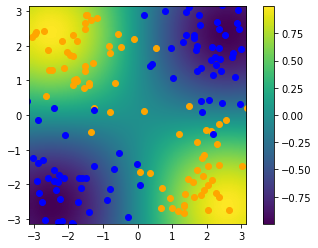

epoch 90 loss 0.26252545206524663


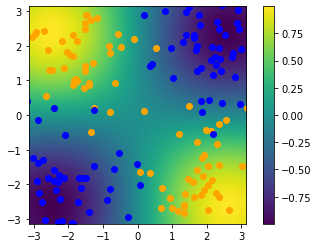

epoch 95 loss 0.26252470257283883


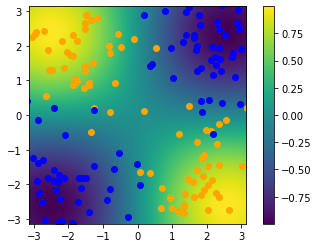

epoch 100 loss 0.262524367933201


In [ ]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)